## Do IMDB Ratings Suffer From Recency Bias?

I've read a lot recently about the recency bias of movie ratings, IMDB ratings in particular. So I decided to try & visualize the phenomenon to see just how strong the bias actually is. This analysis covers nearly 60,000 titles, and includes all US, english language feature films, with user ratings between 1 and 10.
 
Data retrieved from IMDB on June 6th 2019. 

Credit to [dojutsu-user](https://github.com/dojutsu-user/IMDB-Scraper) for his awesome script - worked like a charm.

Edit: I got the ideas to study recency bias from [this HN thread](https://news.ycombinator.com/item?id=20098900) on a previous analysis of mine. The first few graphs below were inspired by [minimaxir's comment and image](https://news.ycombinator.com/item?id=20099344). 

In [144]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
from plotly import tools

In [176]:
layout = cf.Layout(
    height=500,
    width=900,
    title='Relationship between Release Year and Movie Rating',
    xaxis=dict(
        title='Release Year',
    ),
    yaxis=dict(
        title='IMDB Rating',
    )
)

**Note that the colorbars represent number of movies for a given rating in that year.**

### All Titles

- Sometime during the 80s, movie production increased dramatically.
- The vast majority of movies produced over the last 30 years fall within the 5-8 rating.
- That large grouping during the pre- and post-war period is interesting.

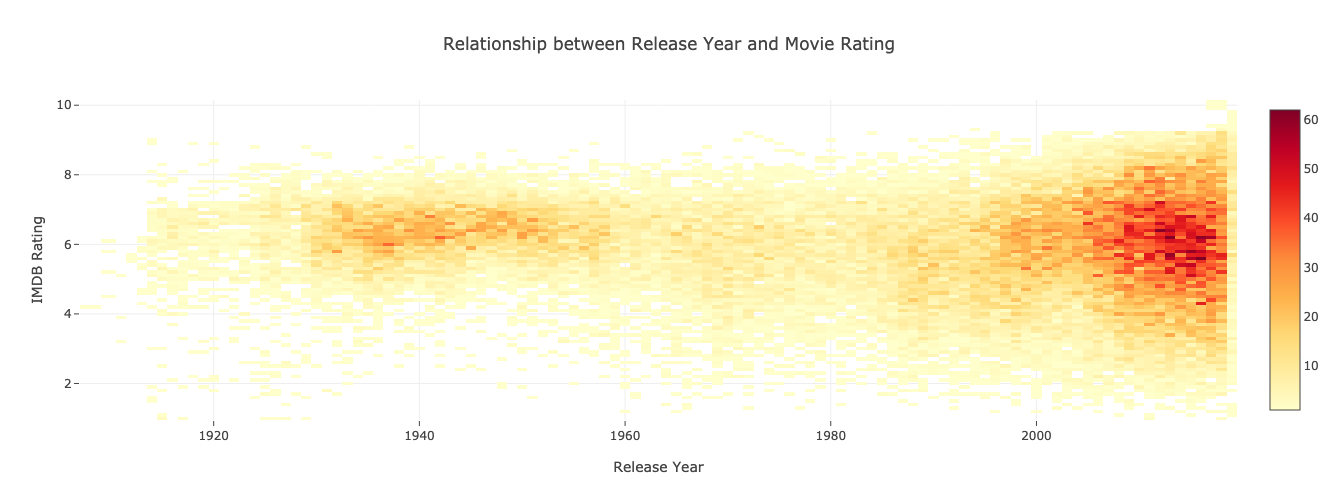

In [177]:
df = pd.read_json('data/movie.json')
df = df[['title','users_rating','year', 'votes']]
df['votes'] = df['votes'].str.replace(',','').astype(float)
df.drop_duplicates(subset ="title", keep = False, inplace = True)
df.groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').pivot(columns='users_rating', values='count').iplot(
    kind='heatmap', theme='white', colorscale='YlOrRd',layout=layout.to_plotly_json(),yTitle='IMDB Rating')

### Titles With At Least 1,000 Votes

- To remove a lot of outliers, especially skit films that receive extremely high ratings with very few votes, we now filter for films with 1,000 votes or more.
- Again, we see the largest grouping of films falling within the 8-5 rating, released in the 21st century.
- However, there is no clear indication of a recency bias for highly-rated (>8) films.

In [178]:
df[df['votes'] > 1000].groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').pivot(columns='users_rating', values='count').iplot(
kind='heatmap', theme='white', colorscale='YlOrRd',layout=layout.to_plotly_json())

### Random 10,000 Title Sample

- A random sample of 10,000 films from our dataset produces similar conclusions to the above.

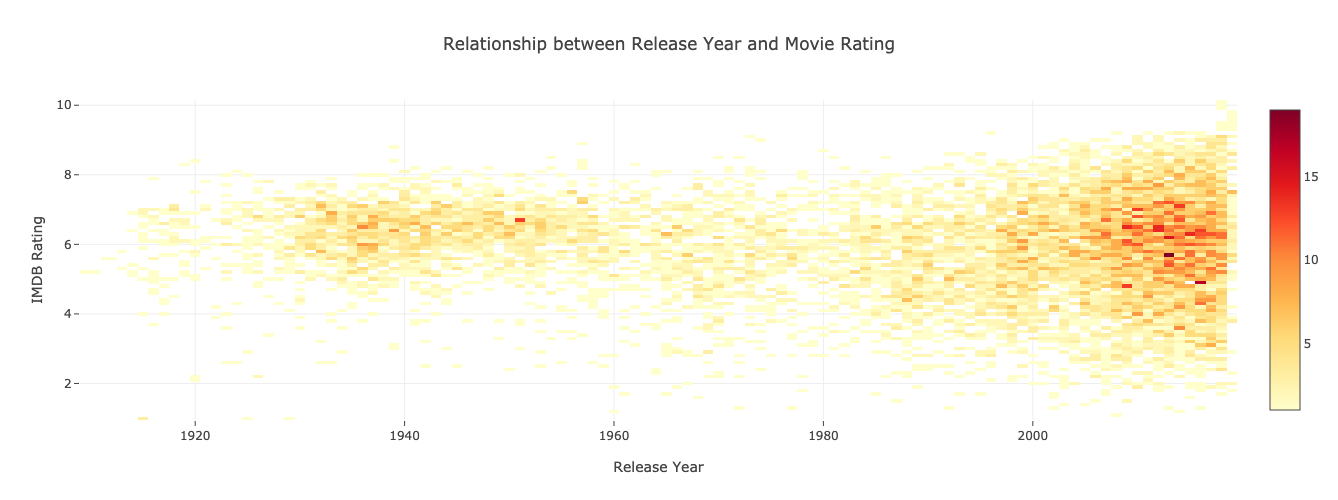

In [183]:
df.sample(10000).groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').pivot(columns='users_rating', values='count').iplot(
kind='heatmap', theme='white', colorscale='YlOrRd',layout=layout.to_plotly_json())

- The strongest conclusion one can draw here is the massive shift in the variance of movie ratings.
- Movies are being produced and released at a faster rate than ever before so, naturally, there are more higher-rated films, but there are also a lot more films rated poorly.

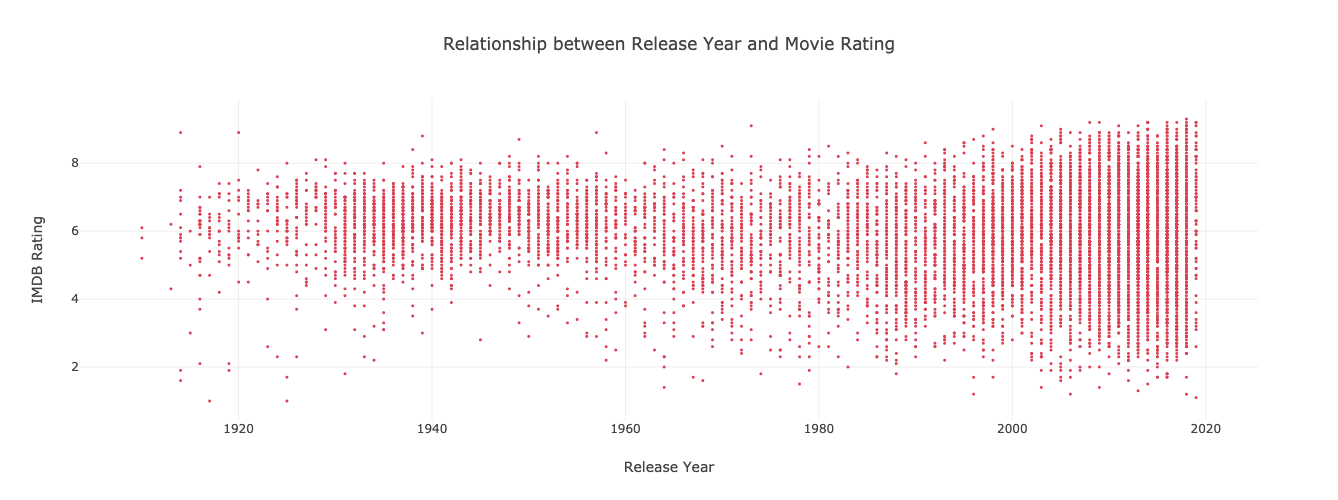

In [149]:
df[['users_rating','year']].sample(10000).iplot(x='year', mode='markers', theme='white', size=3, layout=layout, color='red')

### Impact Of Voters

- There doesn't seem to be any significant correlation between number of votes and a movie's respective rating.

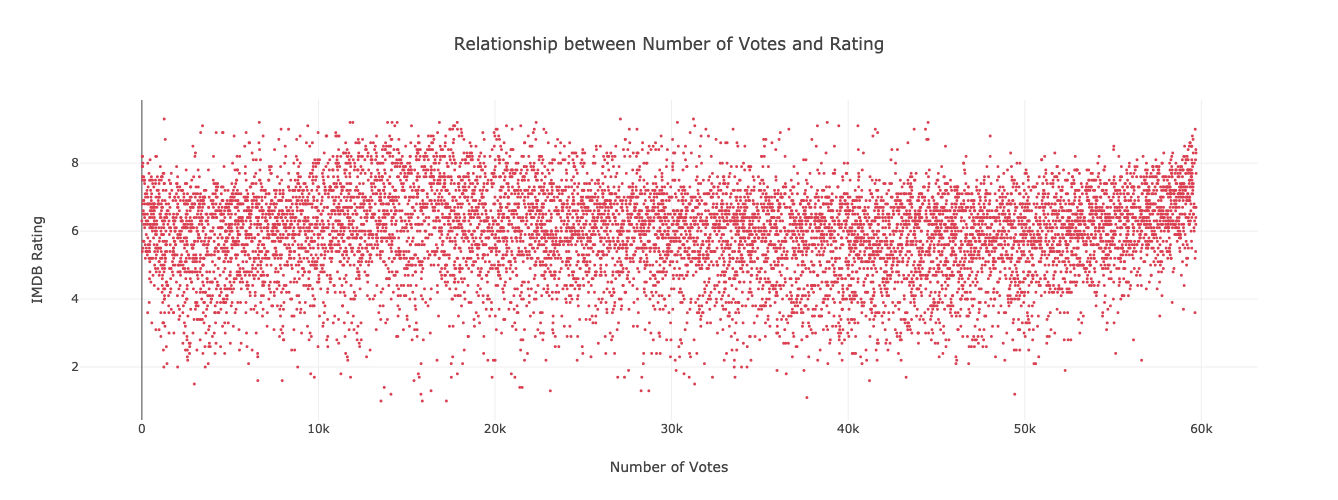

In [150]:
layout = cf.Layout(
    height=500,
    width=900,
    title='Relationship between Number of Votes and Rating',
    xaxis=dict(
        title='Number of Votes',
    ),
    yaxis=dict(
        title='IMDB Rating',
    )
)

df[['votes','users_rating']].sample(10000).iplot(y='users_rating', mode='markers', theme='white', size=3, layout=layout, color='red')

In [151]:
df[['users_rating','votes']].corr()

users_rating     votes
users_rating      1.000000  0.151365
votes             0.151365  1.000000

### Average Rating Per Year Through Time

- There is no obvious increase in the average movie rating over time. In fact, there was a somewhat downward trend between 1950 and 1980.

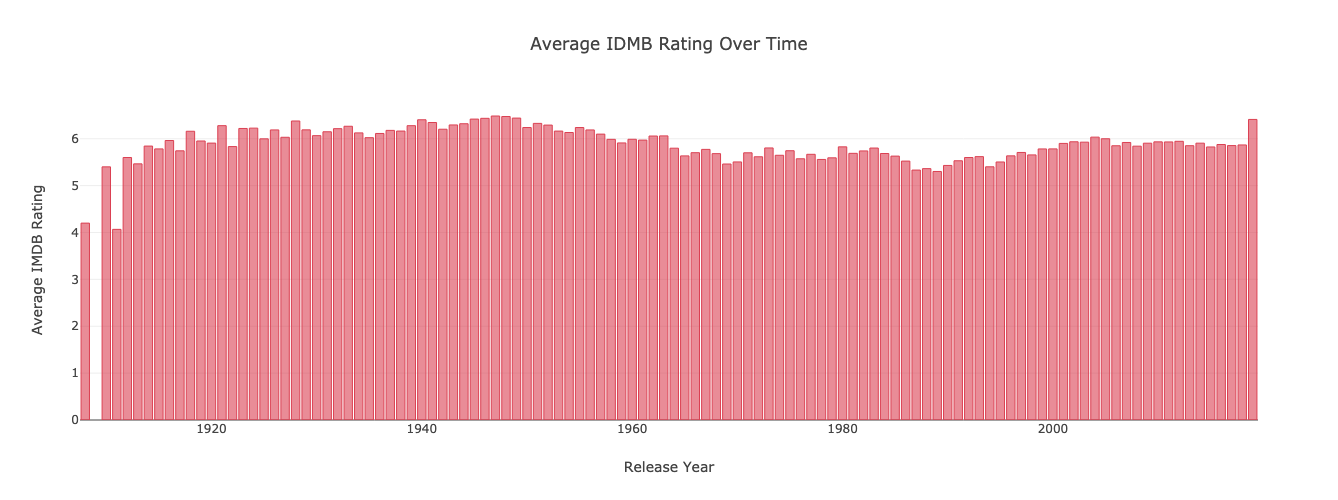

In [185]:
layout = cf.Layout(
    height=500,
    width=900,
    title='Average IDMB Rating Over Time',
    xaxis=dict(
        title='Release Year',
    ),
    yaxis=dict(
        title='Average IMDB Rating',
    )
)

df.groupby("year")["users_rating"].mean().iplot(kind='bar', theme='white', layout=layout, color='red')

### Number of Movies By Ratings

- Below we can see the number of movies released over time between specific rating intervals.

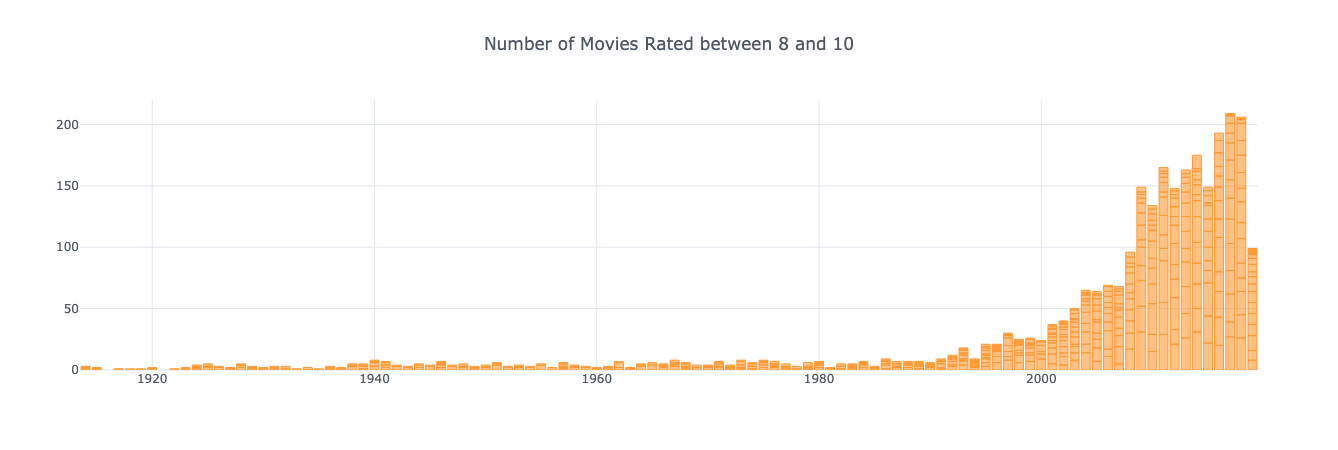

In [153]:
x = df[(df['users_rating'] >= 8) & (df['users_rating'] <= 10)]
x.groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').drop(
    'users_rating',axis=1).iplot(kind='bar', mode='bar', y='count', theme='white', hoverinfo='none', 
                                                      title='Number of Movies Rated between 8 and 10')

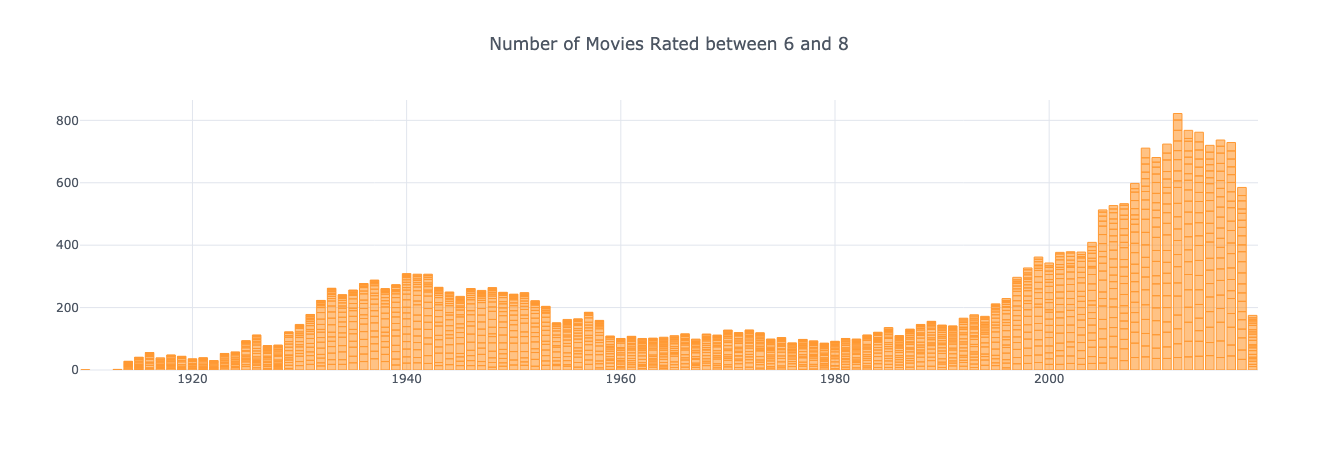

In [154]:
x = df[(df['users_rating'] >= 6) & (df['users_rating'] <= 8)]
x.groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').drop(
    'users_rating',axis=1).iplot(kind='bar', mode='bar', y='count', theme='white', hoverinfo='none', 
                                                      title='Number of Movies Rated between 6 and 8')

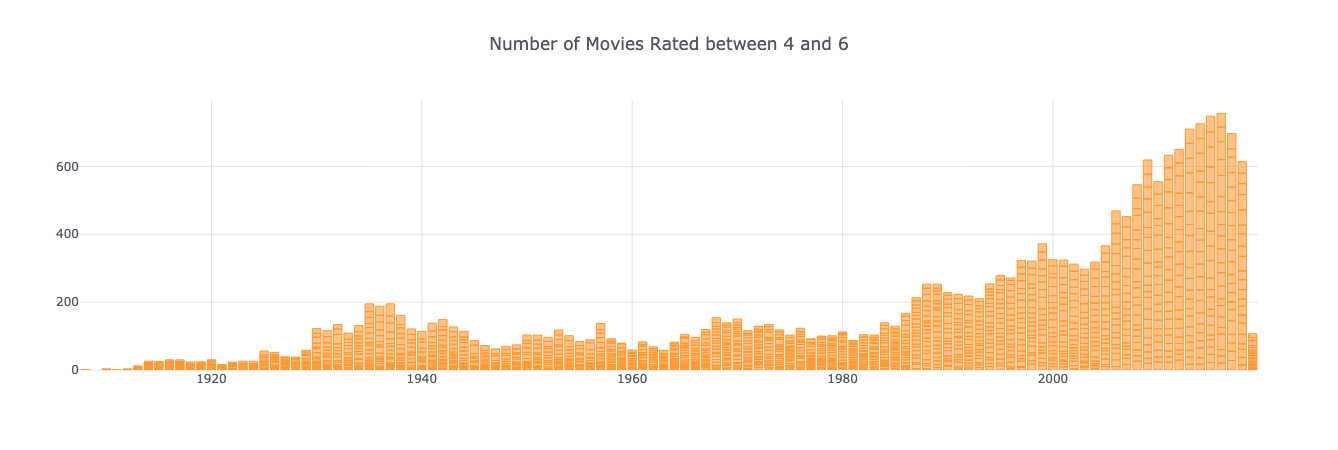

In [155]:
x = df[(df['users_rating'] >= 4) & (df['users_rating'] <= 6)]
x.groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').drop(
    'users_rating',axis=1).iplot(kind='bar', mode='bar', y='count', theme='white', hoverinfo='none', 
                                                      title='Number of Movies Rated between 4 and 6')

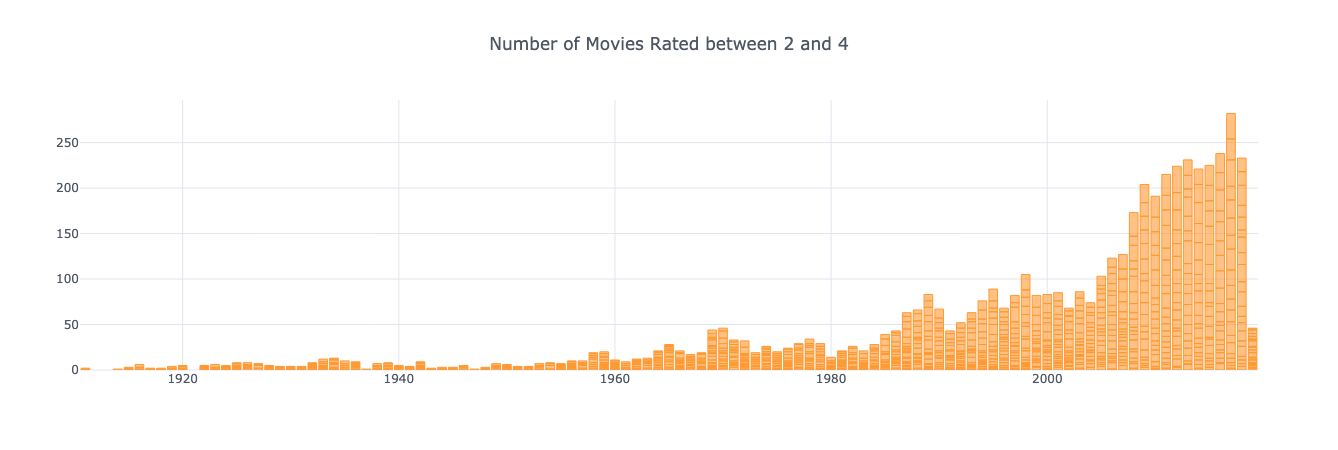

In [156]:
x = df[(df['users_rating'] >= 2) & (df['users_rating'] <= 4)]
x.groupby(["year", "users_rating"])["year"].count().reset_index(name="count").set_index('year').drop(
    'users_rating',axis=1).iplot(kind='bar', mode='bar', y='count', theme='white', hoverinfo='none', 
                                                      title='Number of Movies Rated between 2 and 4')

### Number of Movies Released

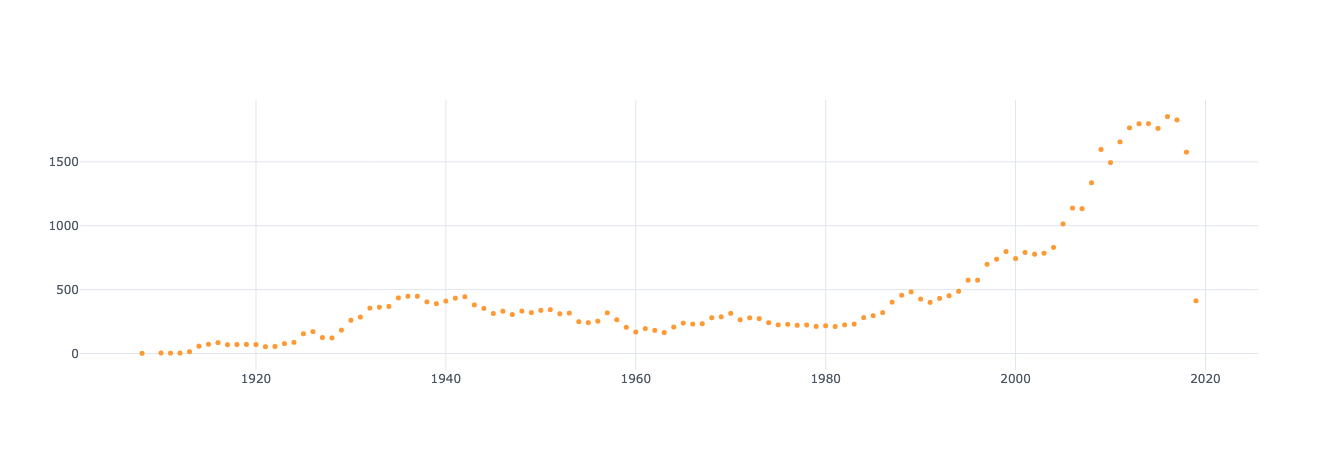

In [173]:
df.groupby(["year"])["year"].count().reset_index(name="count").set_index('year').iplot(mode='markers', theme='white', size=5)

## Conclusion

- There does not seem to be any strong connection between number of votes and a movie's IMDB rating.  
- Since the mid-80s, the number of movies being released has increased dramatically, which has resulted in an extremely large variance in movie ratings over the last 30 or so years. Naturally, the number of high-ranking movies has increased, but so too has the number of low-ranking movies. 
- The number of mid-ranging movies, movies rated between 5 and 8, has increased the most.
- So, there are a lot more high-ranking movies now than there were ever before. This seems mostly due to the sheer increase in movie production.
- In my next post I will use an even larger dataset, which will incorporate foreign-langauge films.